In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
import math
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [18]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a


def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

## Face mask effectiveness 10%

In [19]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
iErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.9, r_sd, r_id, 0, 0, 0, 0)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[2.994003 2.991006 2.988009 ... 2.703294 2.700297 2.6973  ]
 [2.991006 2.988012 2.985018 ... 2.700588 2.697594 2.6946  ]
 [2.988009 2.985018 2.982027 ... 2.697882 2.694891 2.6919  ]
 ...
 [2.703294 2.700588 2.697882 ... 2.440812 2.438106 2.4354  ]
 [2.700297 2.697594 2.694891 ... 2.438106 2.435403 2.4327  ]
 [2.6973   2.6946   2.6919   ... 2.4354   2.4327   2.43    ]]


In [20]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
iErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.9, r_sd, r_id, 0, 0, 0, 0)[0]
print(iErri2)
iErri2_n = np.copy(iErri2)
iErri2_n[iErri2_n<1] = np.nan

[[1.1976012 1.1964024 1.1952036 ... 1.0813176 1.0801188 1.07892  ]
 [1.1964024 1.1952048 1.1940072 ... 1.0802352 1.0790376 1.07784  ]
 [1.1952036 1.1940072 1.1928108 ... 1.0791528 1.0779564 1.07676  ]
 ...
 [1.0813176 1.0802352 1.0791528 ... 0.9763248 0.9752424 0.97416  ]
 [1.0801188 1.0790376 1.0779564 ... 0.9752424 0.9741612 0.97308  ]
 [1.07892   1.07784   1.07676   ... 0.97416   0.97308   0.972    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_21648/1596841067.py:14: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])


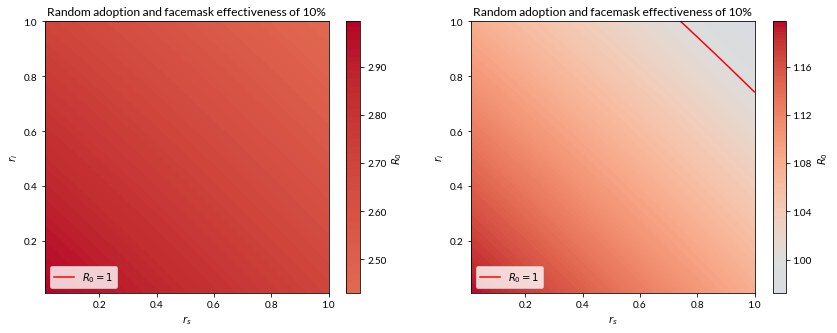

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

C:\Users\crino\AppData\Local\Temp/ipykernel_21648/3435760352.py:10: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])


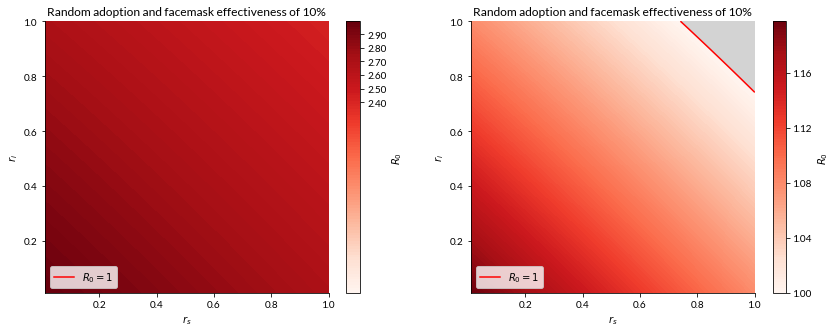

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")

plot_surface = ax[0].contourf(r_s, r_i, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(2.4, 3, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(2.4,3, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

contour_levels = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")

plot_surface = ax[1].contourf(r_s, r_i, iErri2_n, cmap="Reds", levels = contour_levels, vmax=1.2)
# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 30%

In [27]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
sErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.7, r_sd, r_id, 0, 0, 0, 0)[0]
print(sErri)
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan

[[2.982027 2.973054 2.964081 ... 2.111646 2.102673 2.0937  ]
 [2.973054 2.964108 2.955162 ... 2.105292 2.096346 2.0874  ]
 [2.964081 2.955162 2.946243 ... 2.098938 2.090019 2.0811  ]
 ...
 [2.111646 2.105292 2.098938 ... 1.495308 1.488954 1.4826  ]
 [2.102673 2.096346 2.090019 ... 1.488954 1.482627 1.4763  ]
 [2.0937   2.0874   2.0811   ... 1.4826   1.4763   1.47    ]]


In [28]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
sErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.7, r_sd, r_id, 0, 0, 0, 0)[0]
print(sErri2)
sErri2_n = np.copy(sErri2)
sErri2_n[sErri2_n<1] = np.nan

[[1.1928108 1.1892216 1.1856324 ... 0.8446584 0.8410692 0.83748  ]
 [1.1892216 1.1856432 1.1820648 ... 0.8421168 0.8385384 0.83496  ]
 [1.1856324 1.1820648 1.1784972 ... 0.8395752 0.8360076 0.83244  ]
 ...
 [0.8446584 0.8421168 0.8395752 ... 0.5981232 0.5955816 0.59304  ]
 [0.8410692 0.8385384 0.8360076 ... 0.5955816 0.5930508 0.59052  ]
 [0.83748   0.83496   0.83244   ... 0.59304   0.59052   0.588    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_21648/3514793347.py:12: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])


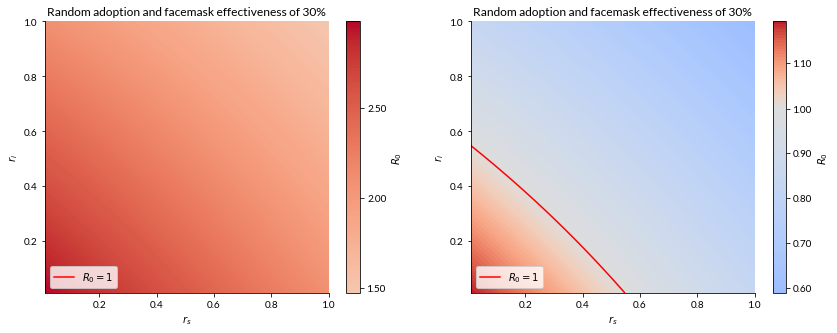

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(sErri2.min(), sErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, sErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits

for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

C:\Users\crino\AppData\Local\Temp/ipykernel_21648/562875413.py:8: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])


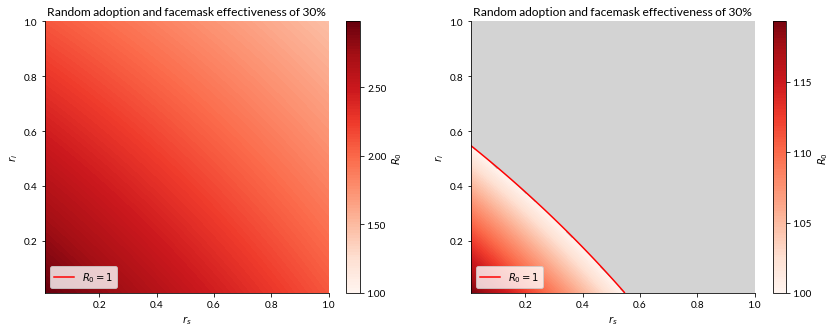

In [43]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(sErri_n)
plot_surface = ax[0].contourf(r_s, r_i, sErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels = np.linspace(1, np.nanmax(sErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax =np.nanmax(sErri2_n)
plot_surface = ax[1].contourf(r_s, r_i, sErri2_n, cmap="Reds", levels = contour_levels, vmax=1.2)
# Plot contour lines
contour = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.05))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.05))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits

for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 50%

In [35]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
cErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.5, r_sd, r_id, 0, 0, 0, 0)[0]
print(cErri)
cErri_n = np.copy(cErri)
cErri_n[cErri_n<1] = np.nan

[[2.970075 2.95515  2.940225 ... 1.52235  1.507425 1.4925  ]
 [2.95515  2.9403   2.92545  ... 1.5147   1.49985  1.485   ]
 [2.940225 2.92545  2.910675 ... 1.50705  1.492275 1.4775  ]
 ...
 [1.52235  1.5147   1.50705  ... 0.7803   0.77265  0.765   ]
 [1.507425 1.49985  1.492275 ... 0.77265  0.765075 0.7575  ]
 [1.4925   1.485    1.4775   ... 0.765    0.7575   0.75    ]]


In [36]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
cErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.5, r_sd, r_id, 0, 0, 0, 0)[0]
print(cErri2)
cErri2_n = np.copy(cErri2)
cErri2_n[cErri2_n<1] = np.nan

[[1.18803 1.18206 1.17609 ... 0.60894 0.60297 0.597  ]
 [1.18206 1.17612 1.17018 ... 0.60588 0.59994 0.594  ]
 [1.17609 1.17018 1.16427 ... 0.60282 0.59691 0.591  ]
 ...
 [0.60894 0.60588 0.60282 ... 0.31212 0.30906 0.306  ]
 [0.60297 0.59994 0.59691 ... 0.30906 0.30603 0.303  ]
 [0.597   0.594   0.591   ... 0.306   0.303   0.3    ]]


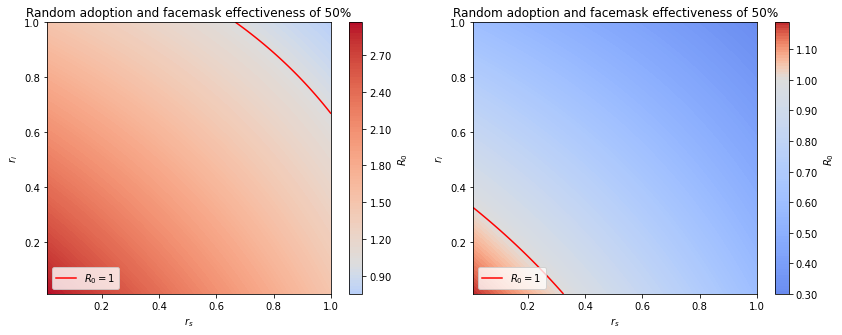

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(cErri.min(), cErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, cErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(cErri2.min(), cErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, cErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()



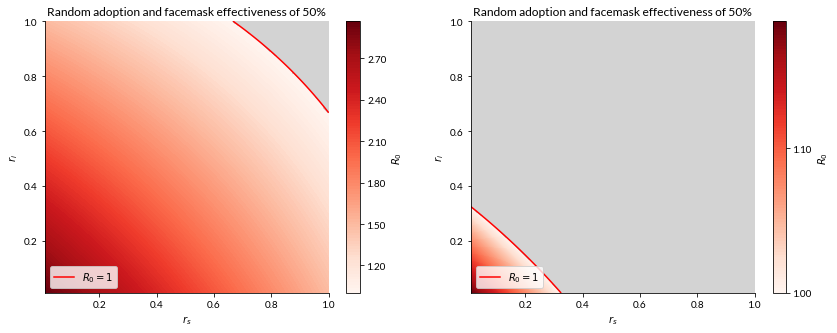

In [42]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(cErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(cErri_n)
plot_surface = ax[0].contourf(r_s, r_i, cErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Random adoption and facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels = np.linspace(1, np.nanmax(cErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax = np.nanmax(cErri2_n)
plot_surface = ax[1].contourf(r_s, r_i, cErri2_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Random adoption and facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits

for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_mask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()

